In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [4]:
train_dir = '/kaggle/input/male-female/GenderOcclusionData/Training'
test_dir = '/kaggle/input/male-female/GenderOcclusionData/Validation'

# Data Generators with minimal preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2)  # Use 20% for validation

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='training')  # Set as training data

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation')  # Set as validation data

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary')


Found 57855 images belonging to 2 classes.
Found 14463 images belonging to 2 classes.
Found 16813 images belonging to 2 classes.


In [5]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [6]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=10)


Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


   2/1807 ━━━━━━━━━━━━━━━━━━━━ 2:19 77ms/step - accuracy: 0.4141 - loss: 0.7236  

I0000 00:00:1716481249.028798     132 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1716481249.049490     132 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1672/1807 ━━━━━━━━━━━━━━━━━━━━ 17s 127ms/step - accuracy: 0.7699 - loss: 0.4589

W0000 00:00:1716481461.660153     131 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1807/1807 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - accuracy: 0.7748 - loss: 0.4515

W0000 00:00:1716481478.837268     129 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1807/1807 ━━━━━━━━━━━━━━━━━━━━ 300s 158ms/step - accuracy: 0.7748 - loss: 0.4515 - val_accuracy: 0.8602 - val_loss: 0.3147
Epoch 2/10
   1/1807 ━━━━━━━━━━━━━━━━━━━━ 2:05 70ms/step - accuracy: 0.9062 - loss: 0.1896

/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1807/1807 ━━━━━━━━━━━━━━━━━━━━ 0s 237us/step - accuracy: 0.9062 - loss: 0.1896 - val_accuracy: 0.8387 - val_loss: 0.2851
Epoch 3/10


W0000 00:00:1716481535.317531     130 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1807/1807 ━━━━━━━━━━━━━━━━━━━━ 137s 76ms/step - accuracy: 0.8913 - loss: 0.2512 - val_accuracy: 0.8911 - val_loss: 0.2577
Epoch 4/10
1807/1807 ━━━━━━━━━━━━━━━━━━━━ 0s 21us/step - accuracy: 1.0000 - loss: 0.0967 - val_accuracy: 0.9677 - val_loss: 0.1754
Epoch 5/10
1807/1807 ━━━━━━━━━━━━━━━━━━━━ 135s 75ms/step - accuracy: 0.9179 - loss: 0.2016 - val_accuracy: 0.9010 - val_loss: 0.2293
Epoch 6/10
1807/1807 ━━━━━━━━━━━━━━━━━━━━ 0s 21us/step - accuracy: 0.9688 - loss: 0.1215 - val_accuracy: 0.8387 - val_loss: 0.3007
Epoch 7/10
1807/1807 ━━━━━━━━━━━━━━━━━━━━ 139s 76ms/step - accuracy: 0.9295 - loss: 0.1729 - val_accuracy: 0.9018 - val_loss: 0.2270
Epoch 8/10
1807/1807 ━━━━━━━━━━━━━━━━━━━━ 0s 23us/step - accuracy: 0.9062 - loss: 0.2234 - val_accuracy: 0.9032 - val_loss: 0.1678
Epoch 9/10
1807/1807 ━━━━━━━━━━━━━━━━━━━━ 137s 75ms/step - accuracy: 0.9449 - loss: 0.1428 - val_accuracy: 0.9032 - val_loss: 0.2280
Epoch 10/10
1807/1807 ━━━━━━━━━━━━━━━━━━━━ 0s 20us/step - accuracy: 0.9688 - loss: 0.1

In [7]:
loss, accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {accuracy}')


526/526 ━━━━━━━━━━━━━━━━━━━━ 78s 149ms/step - accuracy: 0.9380 - loss: 0.1601
Test Accuracy: 0.9365372061729431


W0000 00:00:1716482665.728735     130 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


In [8]:
model.save('gender_classification_modelv2.h5')


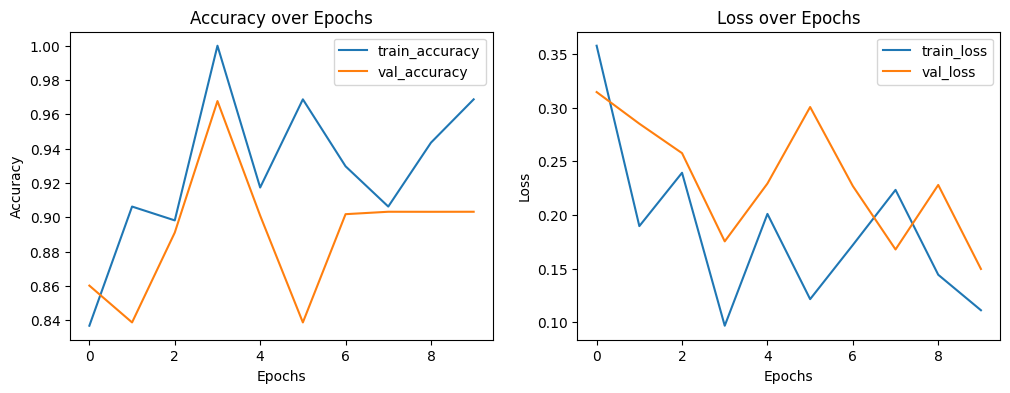

In [9]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss over Epochs')

plt.show()


In [11]:
!pip install gradio

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 42.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.9/315.9 kB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 42.2 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 8.0 MB/s eta 0:00:00
  Created wheel for ffmpy: filename=ffmpy-0.3.2-py3-none-any.whl size=5584 sha256=b087e7a899b8ecbe98a392ece29e060f066eaa42e0c0d55e68b45092b37dbe19
  Stored in directory: /root/.cache/pip/wheels/bd/65/9a/671fc6dcde07d4418df0c592f8df512b26d7a0029c2a23dd81
Successfully built ffmpy
  Attempting uninstall: websockets
    Found existing installation: websockets 12.0
    Uninstalling websockets-12.0:
      Successfully uninstalled websockets-12.0
  Attempting uninst

In [ ]:
from tensorflow.keras.preprocessing import image

import gradio as gr
def preprocess_input_image(img_path):
    # Load the image with target size 224x224
    img = image.load_img(img_path, target_size=(224, 224))
    # Convert the image to a numpy array
    img_array = image.img_to_array(img)
    # Rescale the image (rescale by 1./255)
    img_array /= 255.0
    # Expand the dimensions to match the model's input shape (1, 224, 224, 3)
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

def predict_gender(img_path):
    # Preprocess the input image
    preprocessed_image = preprocess_input_image(img_path)
    # Predict the gender
    prediction = model.predict(preprocessed_image)
    # Interpret the prediction result
    if prediction[0][0] > 0.5:
        return 'Male'
    else:
        return 'Female'
#if gradio didn't work
# imgpath=''
# print(predict_gender("/kaggle/input/male-female/GenderOcclusionData/Training/male/04352_Mask.jpg"))


# # Define the Gradio interface using type annotations
# iface = gr.Interface(
#     fn=predict_gender,
#     inputs=gr.Image(type="numpy", label="Input Image"),
#     outputs=gr.Textbox(label="Gender Prediction"),
#     title="Gender Classification Model",
#     description="Upload an image to predict the gender."
# )

# # Launch the interface
# iface.launch(share=True)